# 주제 : 롤 좀 하니? '이것'만 하면 무조건 이긴다!<br> - 데이터로 알아보는 리그 오브 레전드의 승리 공식
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 League of Legends Diamond Ranked Games (10 min) 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    high_diamond_ranked_10min.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gameId: 게임 판의 고유 ID
    blueWins: 블루팀의 승리 여부 (0: 패배, 1: 승리)
    xxxWardsPlaced: xxx팀에서 설치한 와드의 수 
    xxxWardsDestroyed: xxx팀에서 파괴한 와드의 수
    xxxFirstBlood: xxx팀의 첫번째 킬 달성 여부
    xxxKills: xxx팀의 킬 수
    xxxDeaths: xxx팀의 죽음 수
    xxxAssists: xxx팀의 어시스트 수
    xxxEliteMonsters: xxx팀이 죽인 엘리트 몬스터 수
    xxxDragons: xxx팀이 죽인 용의 수
    xxxHeralds: xxx팀이 죽인 전령의 수
    xxxTowersDestroyed: xxx팀이 파괴한 탑의 수
    xxxTotalGold: xxx팀의 전체 획득 골드
    xxxAvgLevel: xxx팀의 평균 레벨
    xxxTotalExperience: xxx팀의 총 경험치 획득량
    xxxTotalMinionsKilled: xxx팀의 총 미니언 킬 수
    xxxTotalJungleMinionsKilled: xxx팀의 총 정글 미니언 킬 수
    xxxGoldDiff: xxx팀과 다른 팀 간의 골드 획득량 차이
    xxxExperienceDiff: xxx팀과 다른 팀과의 경험치 획득량 차이
    xxxCSPerMin: xxx팀의 분당 CS 스코어
    xxxGoldPerMin: xxx팀의 분당 골드 획득량
      
    
    
- 데이터 출처: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

## 최종 목표
    - 일상에서 볼 수 있는 데이터의 활용
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로부터 인사이트 습득 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 리그 오브 레전드 데이터셋

### E-스포츠와 리그 오브 레전드


### 리그 오브 레전드 데이터셋에 관하여


## Step 1. 데이터셋 준비하기

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [7]:
import os

In [8]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'samjiAㅁnwang'
os.environ['KAGGLE_KEY'] = '86abde4641deb4585043c243d9d68b99'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [15]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d bobbyscience/league-of-legends-diamond-ranked-games-10-min
!unzip '*.zip'

401 - Unauthorized
unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [16]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('high_diamond_ranked_10min.csv')

FileNotFoundError: ignored

In [ ]:
df

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [11]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head() #BlueEliteMonster 는 0,1로만 구분되는 데이터가 아닐 수 도 있다
# 게임특성상 0,1로 구분되는 데이터가 아니라 정수 데이터인데 0,1로 구분되는데이터로 판단될 수 있다 -> numeric으로 볼지 categorical로 볼지는 하면서 결정한다
# 호환되는 값 즉 중복되어 여겨지는 값들이 있는데 이걸 제외해 줘야함 Ex) 레드팀 킬 수 = 블루팀 데스 수. Bluegodldiff랑 redgolddiff는 서로 마이너스붙여주면 같은값이 됨

NameError: ignored

In [12]:
df.info() #비어있는 값 없음

NameError: ignored

In [ ]:
df.describe() #wins를 보면 0.5에 근접 : 거의 승패확률이 같다 -> balanced data
# first blood도 마찬가지
# elite monster는 2라는 데이터도 있다
# blue dragon, blue herald 는 0 아님 1 (10분제한이라 그런듯) -> 근데 블루가 잡을 확률이 현저히 낮다
# red dragon 값 까지 합쳐도 1이 안됨 -> 드래곤이랑 헤럴드가 항상 잡히는게 아니다 (근데 레드쪽 mean값이 더 높음),(헤럴드는 블루가 더 높다)

### 문제 5. 각 컬럼의 Correlation 히트맵으로 시각화하기


In [13]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
fig = plt.figure(figsize=(4, 10))
sns.heatmap(df.corr()[['blueWins']], annot=True) #밑에서 본 correleration을 시각화해서 보여줌, annot를 해서 숫자값까지 보여줌
# 'bluewins'를 [] 한겹만 하면 series로 나오는데 [[]]으로 해서 데이터 프레임 형식으로 입력을 넣어 heatmap을 그릴수 있게함
# 와드설치는 별로 의미가 없음 
# firstblood 0.2만큼의 영향
# kill 은 0.34만큼 영향, death는 -0.34만큼의 영향
# total gold, gold diff의 값이 크게나옴 -> 레드팀에비해 많은 골드를 먹으면 승리에 더 높은 영향을 준다고 봄
# cs per min 보다 gold per min의 값이 더 높음 -> cs만 잡는거보다 다른 루트로 골드를 먹는게 더 승리에 영향을 준다고 봄

NameError: ignored

<Figure size 288x720 with 0 Axes>

In [14]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
# 각 column간의 correleration
df.corr()
# redfirstblood = -1.0, bluefirstblood = 1.0 서로 반대되어 나타난다
# reddeath와 bluekill도 마찬가지
# 이렇게 서로 정반대로 나타나는 값들이 있다 -> 동시에 regression 진행시 multicollinearity 문제가 나타남. -> 학습이 양쪽으로 나눠져서 안좋은 결과가 나옴 -> 배제해야함

NameError: ignored

In [ ]:
fig = plt.figure(figsize = (8,8))
sns.heatmap(df.corr())
# 게임아이디는 그냥 배정된 값이니까 어떤것과도 연관이 없다
# blue가 이기는지 지는지(메인관심사)에 다른 feature들이 어떻게 영향을 주는지: 와드는 별로 영향없음 -> 따로 빼서 본다

### 문제 6. 각 컬럼과 승리 여부의 관계 시각화하기


In [ ]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

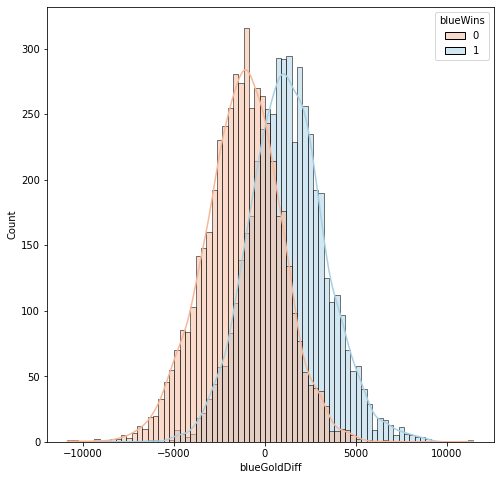

In [15]:
# Seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 승/패의 관계를 시각화
# heatmap 상으로 correleration 이 가장 높았던 blue gold diff로 한번 봐본다\
fig = plt.figure(figsize = (8,8))
sns.histplot(x='blueGoldDiff', data=df, hue='blueWins', palette='RdBu', kde=True)
# 블루가 이긴경우와 레드가 이긴 경우가 각각 깔끔하게 gaussian으로 나타남

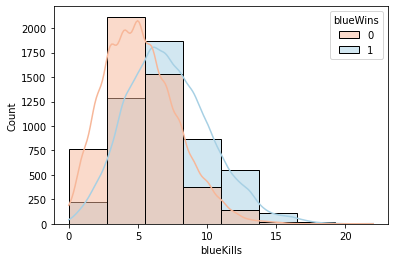

In [ ]:
sns.histplot(x='blueKills', data=df, hue='blueWins', palette='RdBu', kde=True, bins=8) # 범위가 좁은형태라 bins로 하면 좀더 보기 좋은 그래프
#레드가 이겼을때 블루의 킬값과, 블루가 이겼을때 블루의 킬값을 보여줌 -> 위보다는 덜 정석으로 나타남

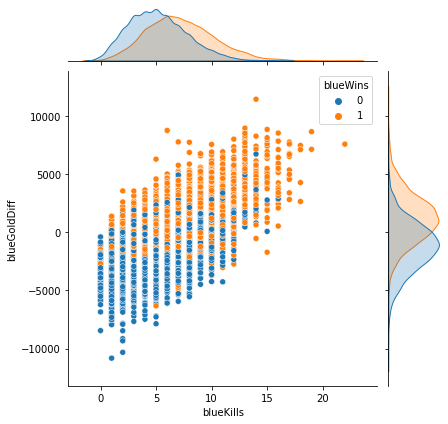

In [16]:
sns.jointplot(x='blueKills', y='blueGoldDiff', data=df, hue='blueWins')
# 어느정도 상관성이 있지만 양옆으로 퍼진걸보니 완전히 상관성이 있지는 않다. 다만 서로 갈라지는 부분이 있어서 상호보완적으로 쓸 수는 있어보임

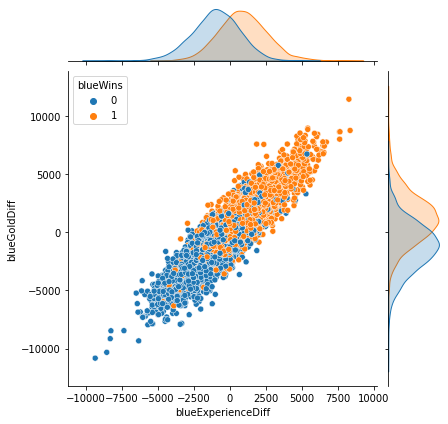

In [ ]:
sns.jointplot(x='blueExperienceDiff', y='blueGoldDiff', data=df, hue='blueWins')
# 히트맵에서 가장 값이 높았던 두개
# 경험치가 많다 = 경험치 얻는 과정에서 많은 골드를 획득 => 상관성이 높은게 당연
# 일자에 가깝게 나타날 수록 상관성이 낮은 두 FEATURE보다 FEATURE 두개르 보는 효과가 떨어짐

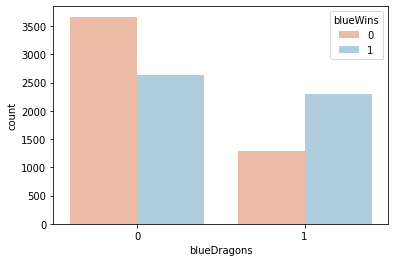

In [ ]:
sns.countplot(x='blueDragons', data=df, hue='blueWins', palette='RdBu') #히트맵상 카테고리컬 데이터 중에 가장 높은값
# 드래곤을 잡았을때 블루가 승리확률이 더 높다
# 블루가 못죽였을때 데이터가 더 큰걸보니 드래곤 자체를 못잡을 확률은 더 커보임

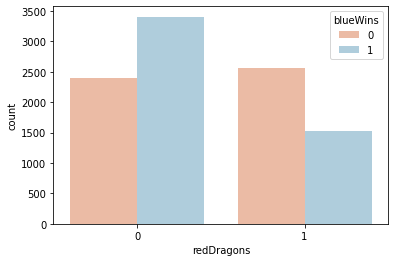

In [ ]:
sns.countplot(x='redDragons', data=df, hue='blueWins', palette='RdBu')
# 위와 반대임
# BLUE에 비해 레드가 드래곤을 처치할 비율은 더 높다. (0과 1의 각각 데이터량이 크게 차이나지 않는다)
# 레드가 드래곤을 처치하는것과 블루가 드래곤을 처치하는것은 비대칭적이다


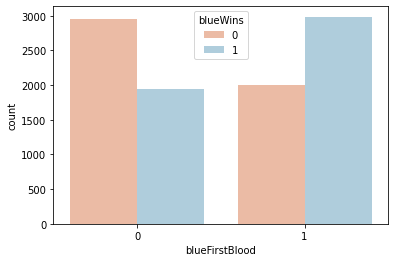

In [ ]:
sns.countplot(x='blueFirstBlood', data=df, hue='blueWins', palette='RdBu')
# 양측의 차이가 별로 없다
# 첫킬을 한쪽의 승리수가 더 많다

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용해 수치형 데이터 표준화하기


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
df.columns

NameError: ignored

In [5]:
df.drop(['gameId', 'redFirstBlood', 'redKills', 'redDeaths',
       'redTotalGold', 'redTotalExperience', 'redGoldDiff',
       'redExperienceDiff'], axis=1, inplace=True) #inplace로 바뀐점 반영
# multicolinearity 위험요소 제거

NameError: ignored

In [ ]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = df[['blueWardsPlaced', 'blueWardsDestroyed', 
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin']] # Numerical value 빼내기
X_cat = df[['blueFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons', 'redHeralds']] #categorical 빼내기

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns) #다시 데이터 프레임으로 만듬

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['blueWins']

In [ ]:
X #

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueFirstBlood,blueDragons,blueHeralds,redDragons,redHeralds
0,0.316996,-0.379275,0.935301,-0.046926,1.071495,-0.879231,-0.210439,0.460179,-1.035635,-0.740639,-0.992782,-1.465951,0.256228,0.013342,-0.992782,0.460179,-0.399207,1.532493,0.329496,-0.914893,-0.198353,-0.410475,-0.928741,0.367685,-0.928741,0.052293,1,0,0,0,0
1,-0.570992,-0.839069,-0.393216,-0.387796,-0.404768,-0.879231,-0.210439,-1.166792,-1.035635,-1.385391,-1.953558,-0.758722,-1.191254,-0.593342,-1.953558,-1.166792,-0.561751,-0.805870,-1.148188,2.277700,4.412301,-0.410475,1.033784,0.068504,1.033784,0.758619,0,0,0,1,1
2,-0.404494,-1.298863,0.271042,1.657424,-0.650812,0.719503,-0.210439,-0.254307,-1.691092,-1.422043,-1.404543,-0.455624,-0.483614,-0.520436,-1.404543,-0.254307,-0.399207,0.129475,1.807181,-0.914893,-0.198353,-0.410475,-0.654900,-2.324944,-0.654900,0.533909,0,1,0,0,0
3,1.149484,-0.839069,-0.725346,-0.387796,-0.404768,0.719503,-0.210439,-0.876959,0.275280,0.021567,-0.718275,0.453671,-0.544350,0.013863,-0.718275,-0.876959,-0.399207,-0.338198,0.822058,-0.914893,-0.198353,0.244627,0.805583,-0.430131,0.805583,-0.007406,0,0,1,0,0
4,2.925460,0.540312,-0.061087,-0.046926,-0.158724,-0.879231,-0.210439,-0.067382,0.275280,0.512211,-0.306513,0.655736,-0.415133,0.137283,-0.306513,-0.067382,-0.290844,-0.338198,0.083215,0.681403,-0.198353,0.244627,0.349182,1.564408,0.349182,0.613731,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,-0.293496,-0.379275,0.271042,-0.728666,-0.404768,0.719503,-0.210439,0.821656,0.930738,0.865408,-0.260762,1.868129,1.020936,1.303263,-0.260762,0.821656,1.280419,0.129475,0.083215,-0.914893,-0.198353,-0.410475,0.531742,-1.726582,0.531742,-0.833801,1,1,0,0,0
9875,1.759976,-1.298863,-0.061087,-0.728666,0.333364,0.719503,-0.210439,-0.172894,0.930738,1.105315,0.745765,-0.253559,0.312888,0.479942,0.745765,-0.172894,-0.561751,8.547582,-0.901908,-0.914893,-0.198353,0.244627,-0.517980,0.467412,-0.517980,-0.692938,0,1,0,0,0
9876,0.039499,-0.839069,-0.061087,0.293944,-0.404768,-0.879231,-0.210439,-0.391082,0.275280,0.086541,-0.306513,-0.556657,-0.990702,-0.959957,-0.306513,-0.391082,-0.453388,-1.273543,1.068338,0.681403,-0.198353,1.554831,1.992226,0.866319,1.992226,1.227490,0,0,0,1,0
9877,-0.459994,0.540312,-1.389604,-1.069536,-0.896856,0.719503,-0.210439,-1.331573,-1.035635,-0.582367,0.334004,-0.253559,-0.347874,-0.547516,0.334004,-1.331573,2.364049,0.597148,-1.394469,-0.914893,-0.198353,0.899729,1.353264,-1.128220,1.353264,-0.798921,1,1,0,0,0


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 문제 10. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



### 문제 11. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 12. 모델 학습 결과 평가하기


In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



## Step5 모델 학습 결과 심화 분석하기


### 문제 13. Logistic Regression 모델 계수로 상관성 파악하기

In [2]:
mode_lr.coef_.shape # (1,31) 로 나옴
model_lr.coef_[0] #1차원으로 만들어줌


NameError: ignored

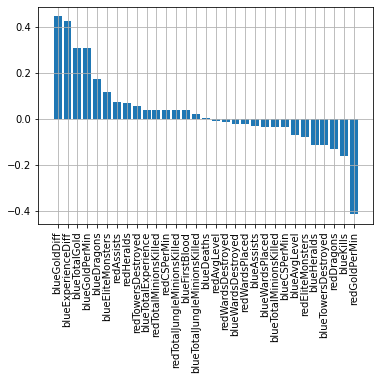

In [ ]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
model_coef = pd.DataFrame(data=model_lr.coef_[0], index=X.columns, columns=['Model Coefficient']) #플랏에서 크기순으로 정렬하기전 데이터프레임으로 만들어 소팅이 가능하게 해줌
model_coef.sort_values(by='Model Coefficient', ascending=False, inplace=True)
plt.bar(model_coef.index, model_coef['Model Coefficient'])
plt.xticks(rotation=90)
plt.grid() #플랏상에 선을 그려줌
plt.show()

### 문제 14. XGBoost 모델로 특징의 중요도 확인하기

<BarContainer object of 31 artists>

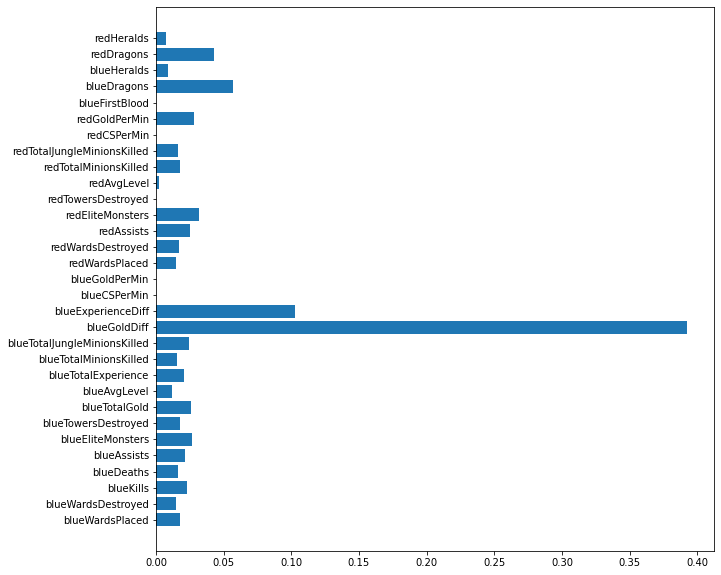

In [ ]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(10, 10))
plt.barh(X.columns, model_xgb.feature_importances_) 

In [ ]:
#데이터로는 이렇다 정도만
# 내생각과 데이터가 같은지 다른지
# 데이터가 bias된지 판단해서 좋은 결과인지 한번 생각해보자